# Chapitre 1 - Séries de Fourier

## I. Les signaux envisagés : Signaux périodiques

### 0) Exemples de signaux réels 

Commençons par visualiser quelques signaux réels provenant d'enregistrements.


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io

class signal_mono: 
    pass

def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 

def lecture(nom_fichier):
    out = signal_mono()
    rate, data = io.read(nom_fichier)
    out.x = normaliser_son_mono(data[:,0])
    out.N= np.size(out.x)
    out.Fs=rate
    out.t=np.arange(out.N)/rate
    return out
    
def extraire(signal,t_min,t_max):
    condition = ( signal.t   < t_max )*( signal.t > t_min)
    out= signal_mono
    out.x = np.extract(condition,signal.x)
    out.t=np.extract(condition,signal.t)
    out.N= signal.N
    out.Fs=signal.Fs
    return out

Tout d'abord un enregistrement du *la* 3 du piano 

In [50]:
signal=lecture('la_piano.wav')
signal_zoom= extraire(signal1,2,2.1)
plt.figure(1,figsize = (10, 10)) 
plt.clf()
plt.subplot(1,2,1) 
plt.plot(signal.t,signal.x)
plt.subplot(2,2,2) 
plt.plot(signal_zoom.t,signal_zoom.x)
signal_zoom= extraire(signal,2,2.01)
plt.subplot(2,2,4) 
plt.plot(signal_zoom.t,signal_zoom.x)
plt.show()

NameError: name 'signal1' is not defined

On remarque à horizon temporel court (de l'ordre de $0.01s$) que le signal laisse apparaître un motif (*pattern*) : on parle de périodicité à court-terme.  On compte que $4$ motifs durent environ $0.009$s soit une fréquence de $444$Hz : on retrouve par cette méthode très approximative la fréquence du diapason $440$Hz. 

Reprenons cette étude avec cette fois le son entretenu d'un violon sur la même note (le *la* à $440$Hz, corde à vide) : 

In [ ]:
signal=lecture('la_vide.wav')
signal= extraire(signal,1,8.5)

plt.figure(1,figsize = (10, 10)) 
plt.clf()
plt.subplot(1,2,1) 
plt.plot(signal.t,signal.x)

plt.subplot(2,2,2) 
signal_zoom= extraire(signal,3,3.1)

plt.plot(signal_zoom.t,signal_zoom.x)
signal_zoom= extraire(signal,3,3.01)
plt.subplot(2,2,4) 
plt.plot(signal_zoom.t,signal_zoom.x)
plt.show()

Les remarques faites pour le son de piano sont encore pertinentes ici.
On retrouve bien un motif périodique de période $T_0\simeq \frac{1}{440}$.
Bien entendu, le motif ne ressemble pas du tout à celui constaté pour le son de piano. 

Reprenons l'étude pour le son de violon avec vibrato : 

In [ ]:
signal=lecture('la_vibrato.wav')
signal= extraire(signal,1,8.5)

plt.figure(1,figsize = (10, 10)) 
plt.clf()
plt.subplot(1,2,1) 
plt.plot(signal.t,signal.x)

plt.subplot(2,2,2) 
signal_zoom= extraire(signal,3,3.1)

plt.plot(signal_zoom.t,signal_zoom.x)
signal_zoom= extraire(signal,3,3.01)
plt.subplot(2,2,4) 
plt.plot(signal_zoom.t,signal_zoom.x)
plt.show()

 On "voit" la présence du vibrato en ce sens qu'il modifie l'enveloppe du signal (analyse à moyen terme). A horizon plus court (de l'ordre de quelques motifs), on constate que le motif a changé par rapport au cas d'une corde à vide : le **timbre** est modifié.


### 1) Modèle mathématique : signaux périodiques 

>- A partir d'enregistrements, nous avons pu faire la conjecture que : les sons acoustiques perçus comme ayant une "hauteur" bien définie sont des signaux périodiques à court-terme.

>- Cette conjecture est appuyée par des faits précis : les vibrateurs sont associés à des modèles mathématiques sous-jacents. En général, le signal produit est solution d'une équation différentielle d'ordre 2 en les variables d'espace et de temps à avec conditions aux limites. Les solutions sont périodiques. Exemple : cordes vibrantes (voir plus loin)

>- On se propose de considérer un modèle mathématique d'un signal acoustique : $x(t)$ périodique de période $T_0$. Ainsi pour tout instant $t$, on a  : 
$$
x(t)=x(t+T_0).
$$



Notons qu'il est équivalent de connaître $\tilde{x}:[-T_0/2,T_0/2[ \to \mathbb{R}$ défini par 
$$
\forall t\in [-T_0/2,T_0/2[\ : \ \ \ \tilde{x}(t)=x(t). 
$$
En effet, on a 
$$
x(t)=\sum_{k\in \mathbb{Z}} \tilde{x}(t)=x(t-kT_0).
$$
Les signaux en question (en maths : on les appelle des fonctions) ne sont pas quelconques; il faut préciser soit leur régularité, soit le fait que leur énergie est finie... 

* signaux continus : $\mathcal{C}_{T_0}$
* signaux $\mathcal{C}^1$ par morceaux
* signaux d'énergie finie tels que $\int_{0}^{T_0}|x(t)|^2dt <\infty $ : ensemble noté $$x\in L^2_{T_0}.$$
* signaux intégrables tels que $\int_{0}^{T_0}|x(t)|dt <\infty $ : ensemble noté $$x\in L^1_{T_0}.$$

Les deux dernières classes sont plus vastes que les deux premières puisqu'une fonction continue est intégrale et est d'énergie finie; idem pour les fonctions $\mathcal{C}^1$ par morceaux.  

On pourra bien sûr se demander pourquoi prendre tant de précautions alors qu'un signal physique mesuré tel qu'un son est évidemment régulier ($\mathcal{C}^\infty$), a une énergie finie, *etc*.! Une réponse possible est : on s'intéresse à des signaux $x(t)$ qui sont des **modèles mathématiques** permettant de cerner une réalité physique. 
   * Exemple : une corde de violon pincée a la forme d'un triangle avant d'être lâchée. Le triangle n'est pas une fonction dérivable! La "vraie" forme de la corde est plus "souple" mais le triangle est un modèle. 
   * Autre exemple : un signal qui périodiquement prend de grandes valeurs peut être modélisé ainsi : 
$$
x(t)=\ln | \sin(t/2)|.
$$
Cet OVNI n'a pas de réalité physique (divergence aux multiples de $\pi$) mais permet d'envisager la caractéristique - réelle, elle -  de "grandes valeurs". 
**Exercice** Pouvez-vous tracer les graphe de cette fonction sur $]-\pi \ , \ \pi[$? Faites attention! ```Python``` risque de raler et générer une erreur lorsque votre variable est proche de $0,\pm\pi$. Trouvez une astuce pour contourner cette difficulté. 

L'hypothèse minimale que l'on imposera est l'hypothèse d'intégrabilité  sur une période : signaux de $x\in L^1_{T_0}.$

Une propriété utilisée souvent pour l'intégration des fonctions périodiques (à valeurs réelles ou complexes) : 

>-  **Propriété** $$\int_{a}^{a+T_0} f(t)dt = \int_{b}^{b+T_0} f(t)dt$$  On dit que l'on intègre sur un intervalle de longueur $T_0$ sans préciser lequel. On pourra alors noter cette intégrale $$\int_{(T_0)}f(t)dt.$$




##   2. Des signaux périodiques particuliers : polynômes trigonométriques 

Des exemples simples de signaux périodiques : 

$$
\cos(2\pi f_0 t) \text{ et } \sin(2\pi f_0 t)
$$

Mais bien évidemment, en tant de signaux périodiques de période $T_0/2$, les signaux suivants 
$$
\cos(2\pi 2f_0 t) \text{ et } \sin(2\pi 2f_0 t)
$$
sont en particulier périodiques de période $T_0$. 
De même, pour tout entier naturel $k$
$$
\cos(2\pi k f_0 t) \text{ et } \sin(2\pi k f_0 t)
$$
sont  tous deux  périodiques et $T_0$ est une période. 


In [ ]:
t=np.arange(-1.5,1.5,0.01);
plt.figure(3)
plt.plot(t,np.cos(2*np.pi*t),label=r'$\cos(2\pi t) \ \ f_0=1$')
plt.plot(t,np.cos(2*np.pi*2*t),label=r'$\cos(2\pi 2 t) \ \ f_0=2$')

plt.legend(loc='upper right')
plt.show()


De même, et en multipliant par des constantes, on obtient que, pour tout $k=1,2,3,...$
$$
a_k\cos(2\pi kf_0 t) \text{ et } b_k\sin(2\pi kf_0 t)
$$
est périodique de période $T_0$. Il en est de même de la somme : 

>- 
$$
p(t) = a_0/2 + \sum_{k=1}^{N} a_k\cos(2\pi kf_0 t) + b_k\sin(2\pi kf_0 t)
$$
 pour un certain nombre entier $N$ appelé **ordre**.

On propose de ré-écrire $p(t)$ sous forme complexe afin de rendre symétrique l'expression.

---

Rappels (exponentielle complexe, formule d'Euler)

$$
e^{i \theta}=\cos(\theta)+i\sin(\theta)
$$
d'où 
$$
\cos(\theta)=\frac{1}{2}(e^{i\theta}+e^{-i\theta})
$$
$$
\sin(\theta)=\frac{1}{2i}(e^{i\theta}-e^{-i\theta})
$$
Comme $\frac{1}{2i}=-\frac{i}{2}$ on en déduit que 
$$
a_k\cos(2\pi kf_0 t) + b_k\sin(2\pi kf_0 t)=c_k e^{i2\pi k f_0 t } + \overline{c_k}e^{-i2\pi k f_0 t }
$$
où on a posé $$
c_k=\frac{a_k-ib_k}{2}.
$$

---



>- On a, d'après ce qui précède : 
$$
p(t)=\sum_{k=-N}^{N} c_k e^{i2\pi k f_0 t }
$$
moyennant de définir pour $k>0$ : $c_{-k}=\overline{c_k}$. 

$p(t)$ est appelé polynôme trigonométrique pour la simple raison que $p(t)=\sum_k c_k z^k$ avec $z=e^{i2\pi f_0 t}$. 


--- 

Rappel : si $a=x+iy\in \mathbb{C}$, on définit l'exponentielle
$$
e^{x+iy}=e^{x}e^{iy}
$$
où chacun des termes du produit est connu. La propriété fonctionnelle de l'exponentielle reste alors valable : $e^{a+b}=e^ae^b$.

Par ailleurs, 
$$
\frac{d}{dt}e^{at}=ae^{at}.
$$
Ou encore, si   $a\neq 0$ alors
$$
\int e^{at}dt=\frac{1}{a} e^{at}.
$$

Un résultat élémentaire : 
$$
\frac{1}{T_0}\int_0^{T_0}e^{i2\pi m f_0 t}dt=\delta_m
$$
où $\delta_m=0$ pour tout $m\neq 0$ et $\delta_0=1$. 

---

>- **Théorème** : si $p(t)$ est un polynôme trigonométrique de période $T_0=1/f_0$, alors il existe $N$ entier tel que   $$
p(t)=\sum_{k=-N}^N c_k e^{i2\pi kf_0 t}
 $$
où $$
c_k=\frac{1}{T_0}\int_{(T_0)} p(t)e^{-i2\pi k f_0t}dt
$$


Ces intégrales sont des **intégrales de Fourier**. Les $c_k$ sont les coefficients de Fourier de $p$. 

Evidemment, la classe des polynômes trigonométriques est trop petite : il faut étendre ce résultat à des fonctions plus générales. Pour s'en convaincre, visualisons la forme d'une corde tendue de longueur $L$ que l'on tire depuis son milieu. La forme est celle d'un triangle. Le modèle mathématique est la fonction triangle. Etendons cette fonction par périodicité de période $L$ : soit $x(t)$ la fonction obtenue. Cette fonction peut-elle être un polynôme trigonométrique? Manifestement non, car si elle l'était, alors elle jouirait d'une propriété évidente d'un polynôme trigonométrique : elle serait dérivable sur $\mathbb{R}$. Or la fonction triangle en question n'est pas dérivable en $0,L/2,L,...$ Donc $x(t)$ n'est pas un polynôme trigonométrique. 

Cette classe des polynômes trigonométrique est donc beaucoup trop petite pour permettre d'envisager des signaux réels. Nous montrerons néanmoins un résultat formidable : si le signal est continu, on peut l'approximer avec la précision que l'on veut par un polynôme trigonométrique. 

### 3) Cas de fonctions générales : on pose le problème.

>- Soit $t\mapsto x(t)$ un  signal périodique ($T_0$) à valeurs réelles le plus général possible (intégrable sur une période). On définit les coefficients de Fourier complexes notés $c_k$ (éventuellement $c_k(x)$ lorsque l'on veut insister sur le fait que ce sont les coefficients du signal $x$) : 
$$
\forall k\in \mathbb{Z}\ \ : \ \ c_k=\frac{1}{T_0}\int_{(T_0)} x(t)e^{-i2\pi k f_0t}dt.
$$

>- Ces coefficients, du fait que le signal est réel, ont la propriété de symétrie dite *Hermitienne* :
$$
c_{-k} = \overline{c_k}.
$$

>- La suite des sommes partielles de Fourier est une suite de  polynômes trigonométriques définie par 
$$
S_N(t) = \sum_{k=-N}^N c_k e^{i2\pi kf_0 t}.
$$

D'après le petit calcul algébrique sur les polynômes trigonométriques effectué en amont, on a 
$$
S_N(t) = a_0/2 + \sum_{k=1}^{N} a_k\cos(2\pi kf_0 t) + b_k\sin(2\pi kf_0 t).
$$
avec $a_0=2 c_0$ et $c_k = \frac{a_k-i b_k}{2} $ soit aussi $a_k=2\mathfrak{Re}(c_k)$ et $a_k=-2\mathfrak{Im}(c_k)$ ce qui se lit 
>- 
$$
\forall k \in \mathbb{N} \ \ : \ \ a_k=\frac{2}{T_0}\int_{(T_0)} x(t)\cos(2\pi k f_0 t)dt.
$$
$$
\forall k \in \mathbb{N^*} \ \ : \ \ b_k=\frac{2}{T_0}\int_{(T_0)} x(t)\sin(2\pi k f_0 t)dt.
$$
Ces deux suites de coefficients sont les suites de coefficients réels de Fourier du signal $x$.


En résumé, on a montré que pour un polynôme trigonométrique $p(t)$ alors il existe $N$ tel que
 $p(t)=S_N(t)$. Ce résultat très exigeant n'est pas vrai dans le cas de signaux généraux. Par contre, nous allons montrer que, génériquement, poiur un signal $x$ :
 $$
 x(t) \simeq S_N(t)
 $$
et toute la difficulté est de donner un sens à l'approximation. 

Commençons par traiter un exemple-type. Soit la fonction périodique de période $T_0=1$ définie sur $[-1/2 \ , \ 1/2]$
$$
x(t)=\begin{cases}
1 & \text{si }|t|\leq1/4\\
0 & \text{si }1/4<| t| \leq 1/2.
\end{cases}
$$

Voici les étapes : 
* On dessine le graphe de la fonction sur 2 ou 3 périodes

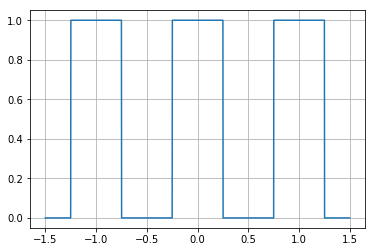

In [54]:
def rectangle(t):
    condition = ( ((t%1) <= 0.25) | ((t%1) >= 0.75))
    x = 1*condition
    return x

t = np.arange(-1.5,1.5,0.001)
r=rectangle(t)
plt.figure(4)
plt.clf()
plt.plot(t,r)

plt.grid()
plt.show()

* On traque les symétries s'il y en a. Ici, $x$ est un signal pair. Cela veut dire qu'il suffit de calculer les coefficients réels $a_k$ car les $b_k$ sont nuls.

* On calcule effectivement ces coefficients en choisissant l'intervalle d'intégration le plus favorable. 
Pour $k\neq 0$ : 

\begin{eqnarray*}
a_{k} & = & \frac{2}{1} \int_{-1/2}^{1/2}x(t)\cos(2\pi kt)dt\\
 & =_{\text{parité}} & 4\int_{0}^{1/2}x(t)\cos(2\pi kt)dt\\
 & = & 4\int_{0}^{1/4}x(t)\cos(2\pi kt)dt\\
 & = & 4\int_{0}^{1/4}1\cos(2\pi kt)dt\\
 & = & \frac{4}{2\pi k}\left[\sin(2\pi kt)\right]_{0}^{1/4}\\
 & = & \frac{2}{\pi k}\sin\left(k\frac{\pi}{2}\right).
\end{eqnarray*}
On remarque que $\sin\left(k\frac{\pi}{2}\right)=0$ si $k$ est pair. Si $k=2\ell +1$ alors 
$$
a_{2\ell+1}=\frac{2}{\pi (2\ell +1)}(-1)^\ell.
$$
Pour $a_0$,  on obtient directement 
$$
a_0=1.
$$

Ensuite, on calcule numériquement la fonction "somme partielle" en jouant avec l'ordre $N$ : 


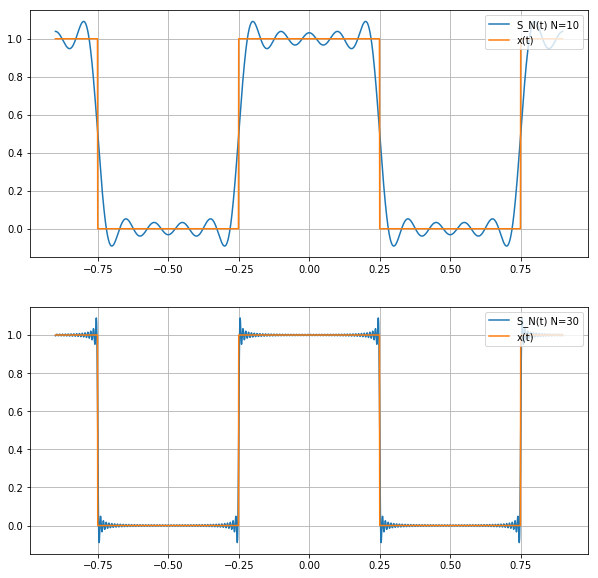

In [55]:
def fourier_rect(N):
    a = np.zeros(N)
    a[0]=1
    indices=np.arange(1,N,2)
    a[indices]=((2/(np.pi))/indices)*((-1)**(np.round((indices-1)/2)))
    return a

N=10
a = fourier_rect(N)
t=np.arange(-0.9,0.9,0.001)

S10=a[1]*np.cos(2*np.pi*t)
k=2
while k<= (N-1):
    S10=S10+a[k]*np.cos(2*np.pi*k*t)
    k=k+1
    
S10=S10+a[0]/2
N=100
a = fourier_rect(N)
S30=a[1]*np.cos(2*np.pi*t)
k=2
while k<= (N-1):
    S30=S30+a[k]*np.cos(2*np.pi*k*t)
    k=k+1
    
S30=S30+a[0]/2

x = rectangle(t)
plt.figure(5,figsize = (10, 10))
plt.subplot(2,1,1)
plt.plot(t,S10,label=r'S_N(t) N=10')
plt.plot(t,x,label=r'x(t)')
plt.legend(loc='upper right')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,S30,label=r'S_N(t) N=30')
plt.plot(t,x,label=r'x(t)')
plt.legend(loc='upper right')
plt.grid()

plt.show()    

Il semble que lorsque $N\to \infty$, la somme partielle "se rappoche" du signal de départ $x(t)$. C'est cette notion de "se rapprocher de" que nous allons éclaircir dans les sections suivantes. 

## II. Approximation quadratique d'un signal d'énergie finie



Dans toute cette partie, on s'intéresse à des signaux $x\in L_{T_0}^2$ c'est-à-dire des signaux périodiques $(T_0)$ tels que 
$$\int_{(T_0)}|x(t)|^2dt <\infty. $$ Le plus pouvant le moins, les signaux envisagés peuvent être à valeurs complexes, cela ne change rien à la théorie. 

$\color{red}{\text{Dans le cadre d'une première lecture, passez les développements : allez directement au résultat. }}$

### 1) Notations 

Afin de simplifier les notations (et permettre une analogie géométrique), on notera pour tout signal (ceci n'a pas été fait en cours, ce n'est pas nécessaire, mais reprenez ces équations avec ces notations pour vous exercer)
$$||x||= \sqrt{\int_{T_0} | x(t)|^2 dt} $$
et pour tous les signaux $x,y$ de  $L_{T_0}^2$
$$\langle x , y \rangle = \int_{T_0} x(t)\overline{y(t)}dt $$. 

**Existence de cette quantité : Voir exercice de TD no 1 (feuille 2) **

On appelle $\langle x , y \rangle$ le produit scalaire entre les deux signaux. 
D'un point de vue calculatoire, on se servira des propriétés élémentaires suivantes : 
* Linéarité à gauche : 
$$
\langle x_1+\alpha x_2 , y \rangle =  \langle x_1 , y \rangle + \alpha \langle x_2 , y \rangle
$$
* anti-linéarité à droite :
$$
\langle x, y_1+ \alpha y_2  \rangle =  \langle x , y_1 \rangle + \overline{\alpha} \langle x, y_2 \rangle.
$$

Nous sommes prêts à poser un problème classique d'approximation : 

### 2) Problème des moindres carrés et sa solution



On fixe un signal $t\mapsto x(t)$ et on cherche parmi tous les  polynômes trigométriques d'ordre $N$ $t\mapsto p_N(t)$ celui (ou ceux?) qui approximent au mieux le signal $x$. Le "au mieux" doit être précisé et on est conduit à définir une distance entre deux fonctions. Dans cette partie, on va choisir la distance *quadratique* définie par 
$$
\delta_N  = \|x - p_N \|.
$$

* Calcul de la distance :
On paramétrise $p_N$ par $p_N(t)=\sum_{k=-N}^{N}\lambda_k e^{i2\pi k f_0 t }$ ce qui s'écrit encore en définissant  $e_k$ ainsi : $e_k(t)=e^{i2\pi k f_0 t }$
$$
p_N= \sum_{k=-N}^{N}\lambda_k e_k.
$$

On développe simplement en utilisant les règles de linéarité/anti-linéarité précédemment évoquées et on trouve (voir cours) 
$$
\delta_N^2 =\|x\|^2+T_0 \sum_{k=-N}^{N} |\lambda_k -c_k |^2 - T_0 \sum_{k=-N}^{N} |c_k |^2 
$$
Rappelons-nous que le but est de trouver les coefficients optimaux $\lambda_{-N},...\lambda_N$ qui minimisent $\delta_N^2$. Ce problème est directement résolu : les coefficients optimaux sont donnés par 
$$
\forall k=-N,...,N \ \ : \ \ \lambda_k = c_k 
$$
Le "meilleur" polynôme trigonométrique est celui dont les coefficients sont les coefficients de Fourier de la fonction $x$! 

>- **Théorème** soit $x\in L_{T_0}^2$; le polynôme trigonométrique qui approxime le signal $x$ au mieux au sens des moindres carrés est $\sum_{k=-N}^{N}c_k e^{i2\pi k f_0 t }$ où les $c_k$ sont les coefficients de Fourier 
$$
c_k = \frac{1}{T_0} \int_{(T_0)} x(t)e^{-i 2\pi k f_0 t }dt.
$$

### 3) Autres enseignements 

Comme $\delta_n^2\geq 0 $ on en déduit que 
$ \|x\|^2 - T_0 \sum_{k=-N}^{N} |c_k |^2 \geq 0$ qui conduit à   l'inégalité de Bessel (qui va nous causer) :
$$
\sum_{k=-N}^{N} |c_k |^2  \leq \frac{1}{T_0} \|x\|^2.
$$
Notons en effet  que cette inégalité est vraie quel que soit $N$ et on peut donc pousser $N\to \infty$. On en déduit : 
$$
\sum_{k=-\infty }^{\infty } |c_k |^2  \leq \frac{1}{T_0} \|x\|^2 <\infty.
$$

Le corollaire est absolument important : puisque la série  $\sum_k |c_k |^2 $ est convergente, on en déduit que son terme général est de limite nulle : 

>- Pour tout signal $x\in L_{T_0}^2$ on a 
$$
\lim_{\pm \infty } c_k(x) = 0.
$$


### 4) Ce que l'histoire ne dit pas...

Il est facile de montrer que l'erreur $\delta_N$ décroît au fur-et-à-mesure que $N$ croît. Mais avec les résultats dont nous disposons, il est impossible d'affimer que $\lim_{N\to \infty }\delta_N =0$. Il se trouve que ce résultat est vrai, mais nous faut provisoirement abandonner la voie "géométrique" précédente. 


## III Pour les signaux réguliers : théorème de Jordan-Dirichlet & co. 

Dans cette partie, $x$ est un signal soit continu, soit $\mathcal{C}_1$ par morceaux; 
on s'attaque au problème de la convergence ponctuelle de la somme partielle 
$$
s_N(t)=\sum_{k=-N}^{N}c_k e^{i2\pi k f_0 t }
$$
où les $c_k=c_k(x)$ sont les coefficients de Fourier de $x. 
Nous ne donnons que les résultats les plus saillants. 

Afin de pouvoir traiter les exercices, nous commençons par énoncer le théorème (le plus important du chapitre). 

>- **Théorème de Jordan-Dirichlet** Soit $t\mapsto x(t)$ un signal périodique ($T_0$)  $\mathcal{C}^1$ par morceaux. On a alors en tout $t$ 
$$
s_N(t) \to_{N\to \infty} \frac{x(t^+)+x(t^-)}{2}
$$
En particulier, en un $t$ où $x$ est continue :  
$$
s_N(t) \to_{N\to \infty} x(t).
$$


 




Reprenons l'exemple du rectangle périodique dont les coefficients de Fourier ont été calculés précédemment. On écrit le résultat de convergence aux points de continuité : 
si $-1/4 < t < 1/4$ alors 
$$
\frac{1}{2} + \frac{2}{\pi}\sum_{\ell=0}^{\infty}\frac{(-1)^\ell}{ (2\ell +1)}\cos(2\pi (2\ell +1) t) = 1
$$
si $1/4 < |t| \leq  1/2$ alors 
$$
\frac{1}{2} + \frac{2}{\pi}\sum_{\ell=0}^{\infty}\frac{(-1)^\ell}{ (2\ell +1)}\cos(2\pi (2\ell +1) t) = 0
$$
      
* On écrit le résultat de convergence aux points de discontinuité. Ici, prenons $t=1/4$ : 
$$
\frac{1}{2} + \frac{2}{\pi}\sum_{\ell=0}^{\infty}\frac{(-1)^\ell}{ (2\ell +1)}\cos(2\pi (2\ell +1) /4) = \frac{1+0}{2}
$$
ce qui conduit à la tautologie $\frac{1}{2}=\frac{1}{2}$...

Notons que pour $t=0$ on obtient un résultat savant : 
$$
\sum_{\ell=0}^{\infty}\frac{(-1)^\ell}{ (2\ell +1)} = \frac{\pi}{4}.
$$
 